In [33]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [34]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [35]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [36]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [37]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

--------------------------------------------------------------------
| Epoch  10 | time:  1.85s | val loss 0.228 | valid accuracy 0.674 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.67s | val loss 0.173 | valid accuracy 0.766 |
--------------------------------------------------------------------
| Epoch  30 | time:  2.48s | val loss 0.145 | valid accuracy 0.806 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.04s | val loss 0.127 | valid accuracy 0.825 |
--------------------------------------------------------------------
| Epoch  50 | time:  1.65s | val loss 0.116 | valid accuracy 0.836 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.57s | val loss 0.108 | valid accuracy 0.848 |
--------------------------------------------------------------------
| Epoch  70 | time:  1.61s | val loss 0.101 | valid accuracy 0.852 |
----------------------------------

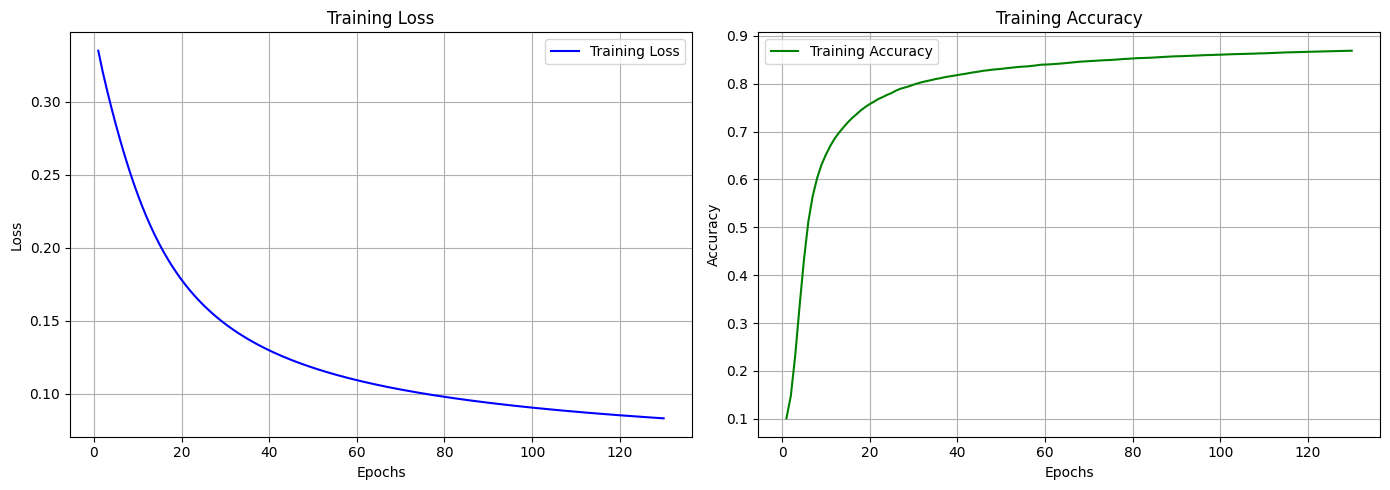

In [38]:
plot_training_history(loss, acc)

In [39]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8807142857142857


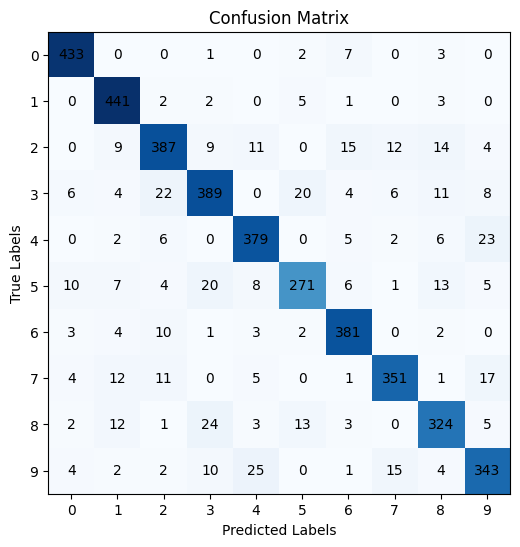

In [40]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Setup NN

In [41]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [42]:
optimizer = AdamOptimizer(learning_rate=0.02)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

--------------------------------------------------------------------
| Epoch  10 | time:  1.92s | val loss 0.079 | valid accuracy 0.863 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.19s | val loss 0.061 | valid accuracy 0.893 |
--------------------------------------------------------------------
| Epoch  30 | time:  2.16s | val loss 0.055 | valid accuracy 0.906 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.74s | val loss 0.051 | valid accuracy 0.915 |
--------------------------------------------------------------------
| Epoch  50 | time:  1.76s | val loss 0.049 | valid accuracy 0.919 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.65s | val loss 0.048 | valid accuracy 0.920 |
--------------------------------------------------------------------
| Epoch  70 | time:  1.90s | val loss 0.047 | valid accuracy 0.922 |
----------------------------------

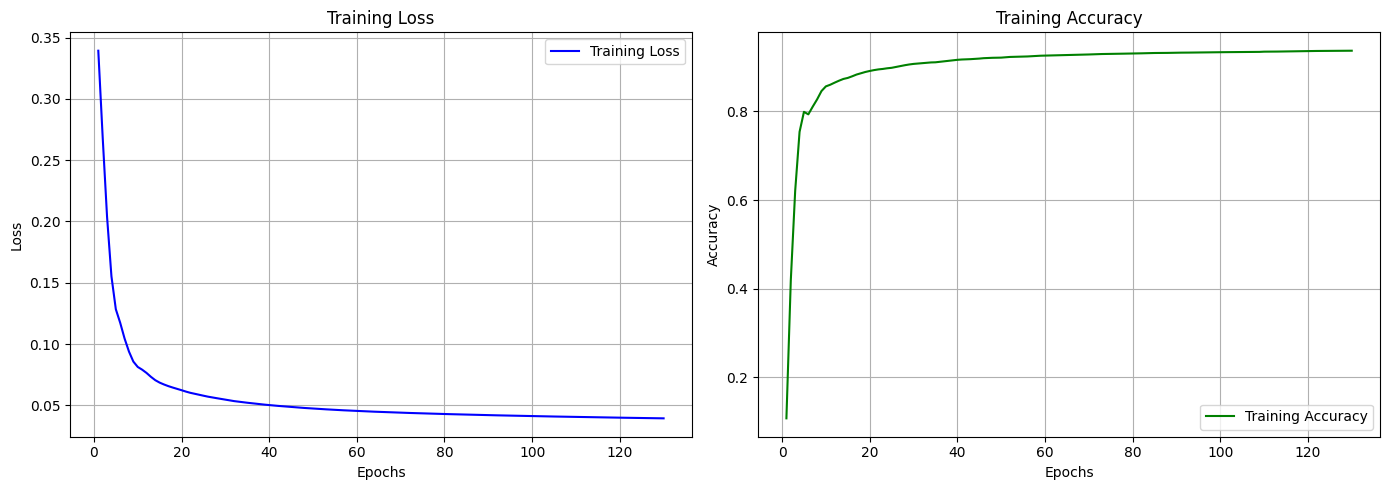

In [43]:
plot_training_history(loss, acc)

In [44]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.930952380952381


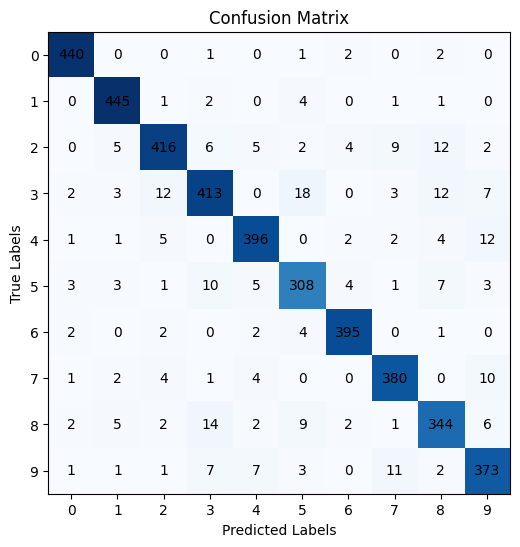

In [45]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

## Fashion MNIST Data

### Load Data

In [46]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [47]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Split Data

In [48]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [49]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [50]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

--------------------------------------------------------------------
| Epoch  10 | time:  2.98s | val loss 0.196 | valid accuracy 0.642 |
--------------------------------------------------------------------
| Epoch  20 | time:  3.08s | val loss 0.162 | valid accuracy 0.685 |
--------------------------------------------------------------------
| Epoch  30 | time:  3.02s | val loss 0.149 | valid accuracy 0.695 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.96s | val loss 0.140 | valid accuracy 0.718 |
--------------------------------------------------------------------
| Epoch  50 | time:  3.27s | val loss 0.133 | valid accuracy 0.738 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.42s | val loss 0.127 | valid accuracy 0.749 |
--------------------------------------------------------------------
| Epoch  70 | time:  2.67s | val loss 0.123 | valid accuracy 0.758 |
----------------------------------

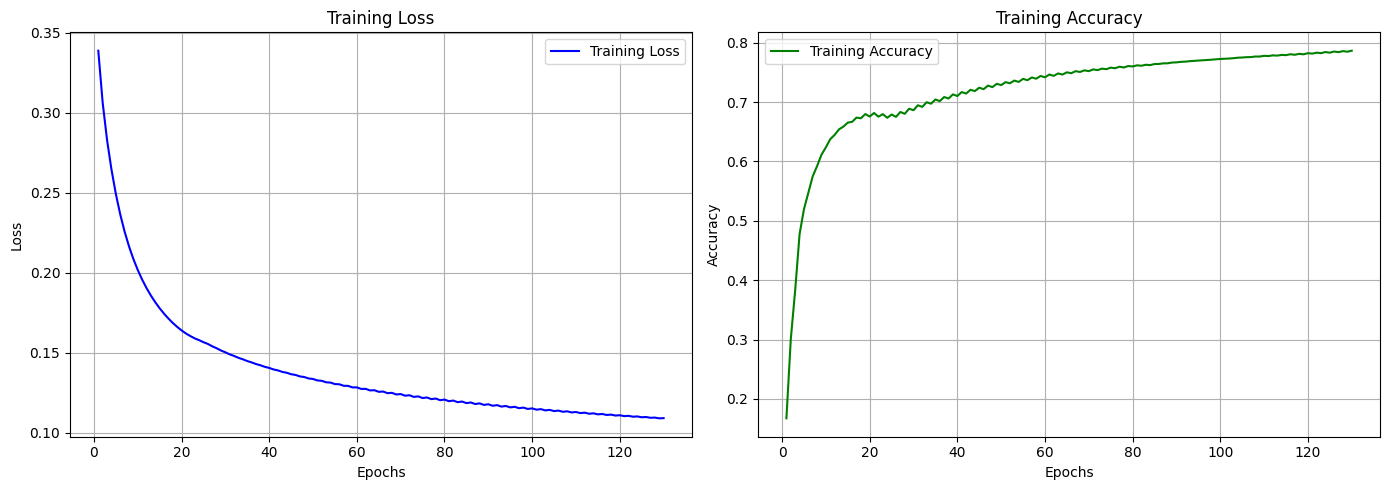

In [51]:
plot_training_history(loss, acc)

In [52]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7835714285714286


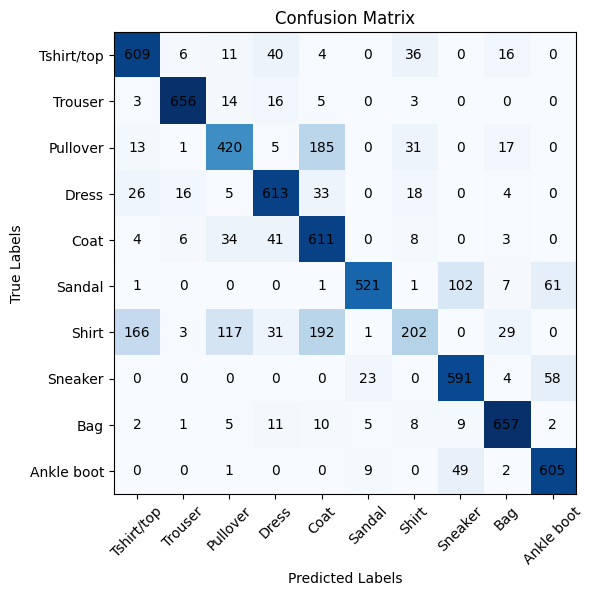

In [53]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)

#### Setup NN

In [54]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [55]:
optimizer = AdamOptimizer(learning_rate=0.02)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

--------------------------------------------------------------------


| Epoch  10 | time:  2.77s | val loss 0.187 | valid accuracy 0.656 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.71s | val loss 0.128 | valid accuracy 0.749 |
--------------------------------------------------------------------
| Epoch  30 | time:  2.87s | val loss 0.109 | valid accuracy 0.787 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.55s | val loss 0.097 | valid accuracy 0.811 |
--------------------------------------------------------------------
| Epoch  50 | time:  2.38s | val loss 0.090 | valid accuracy 0.821 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.35s | val loss 0.087 | valid accuracy 0.829 |
--------------------------------------------------------------------
| Epoch  70 | time:  2.53s | val loss 0.084 | valid accuracy 0.838 |
--------------------------------------------------------------------
| Epoch  80 | time:  3.09s | val l

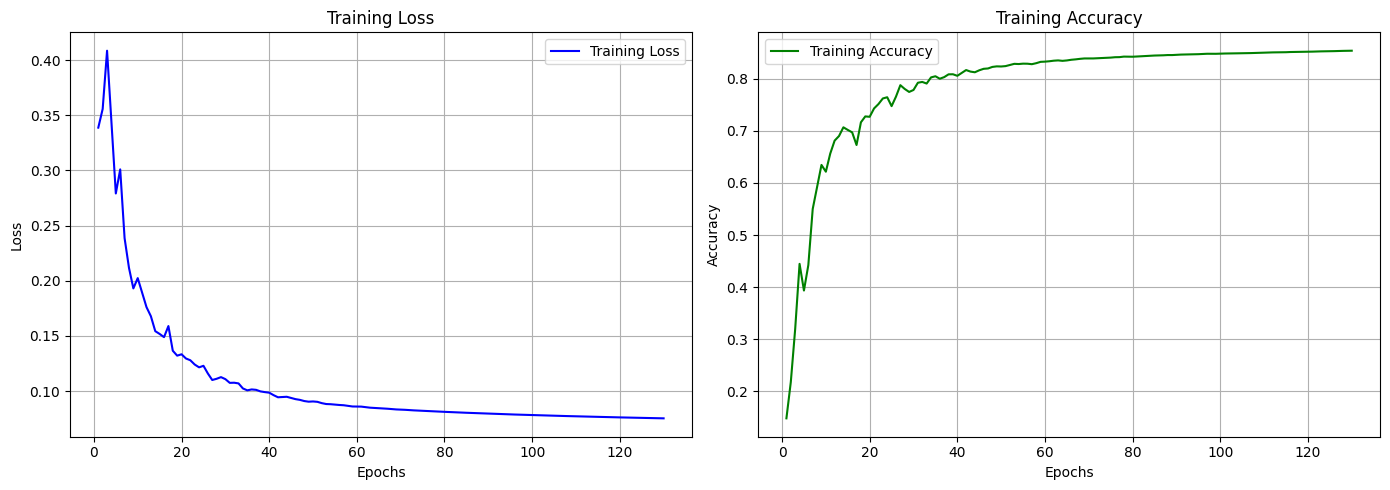

In [56]:
plot_training_history(loss, acc)

In [57]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8452857142857143


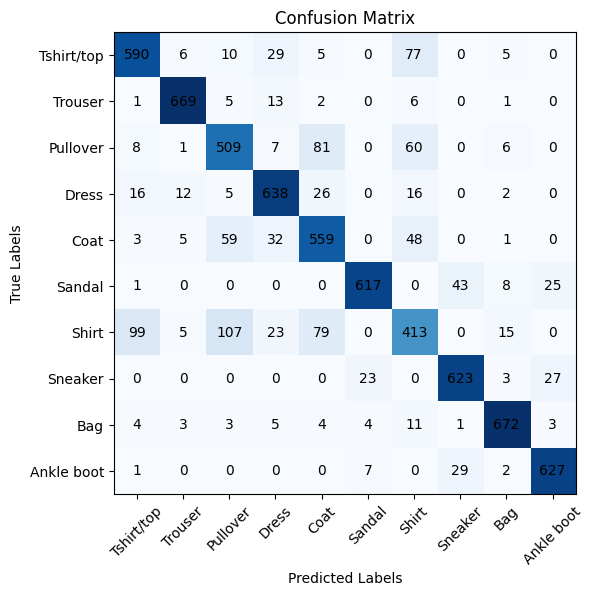

In [58]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)